In [63]:
%matplotlib inline
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
# Read the City and Ride Data
# Read CSV
city_data_to_load = pd.read_csv("C:/Users/Jesus Redentor/Desktop/TAREA MATPLOTLIB/city_data.csv")
ride_data_to_load = pd.read_csv("C:/Users/Jesus Redentor/Desktop/TAREA MATPLOTLIB/ride_data.csv")

# Merge our two data frames together
combined_data = pd.merge(city_data_to_load, ride_data_to_load, how="right", on="city")
combined_data.head()
# Combine the data into a single dataset

# Display the data table for preview


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [64]:
city = combined_data.groupby("city")

fare_av = (city["fare"].mean())
ride_id = (city["ride_id"].count())
driver_count = (city["driver_count"].count())
city_type = (city["type"].unique())
 
#Average Fare ($) Per City
df_city = pd.DataFrame(fare_av)
#Total Number of Rides Per City
df_city['Rides Per City'] = ride_id
df_city['Drivers Per City'] = driver_count
df_city['City Type'] = city_type

df_city.head()




#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)

,fare,Rides Per City,Drivers Per City,City Type
city,,,,
Amandaburgh,24.641667,18,18,[Urban]
Barajasview,25.332273,22,22,[Urban]
Barronchester,36.422500,16,16,[Suburban]
Bethanyland,32.956111,18,18,[Suburban]
Bradshawfurt,40.064000,10,10,[Rural]


## Bubble Plot of Ride Sharing Data

In [65]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = combined_data[combined_data["type"] == "Urban"]
Suburban_cities = combined_data[combined_data["type"] == "Suburban"]
Rural_cities = combined_data[combined_data["type"] == "Rural"]

fare_av1 = urban_cities.groupby("city").mean()["fare"]
driver_count1 = urban_cities.groupby("city").count()["driver_count"]
ride_id1 = urban_cities.groupby("city").count()["ride_id"]

fare_av2 = Suburban_cities.groupby("city").mean()["fare"]
driver_count2 = Suburban_cities.groupby("city").count()["driver_count"]
ride_id2 = Suburban_cities.groupby("city").count()["ride_id"]

fare_av3 = Rural_cities.groupby("city").mean()["fare"]
driver_count3 = Rural_cities.groupby("city").count()["driver_count"]
ride_id3 = Rural_cities.groupby("city").count()["ride_id"]


<IPython.core.display.Javascript object>


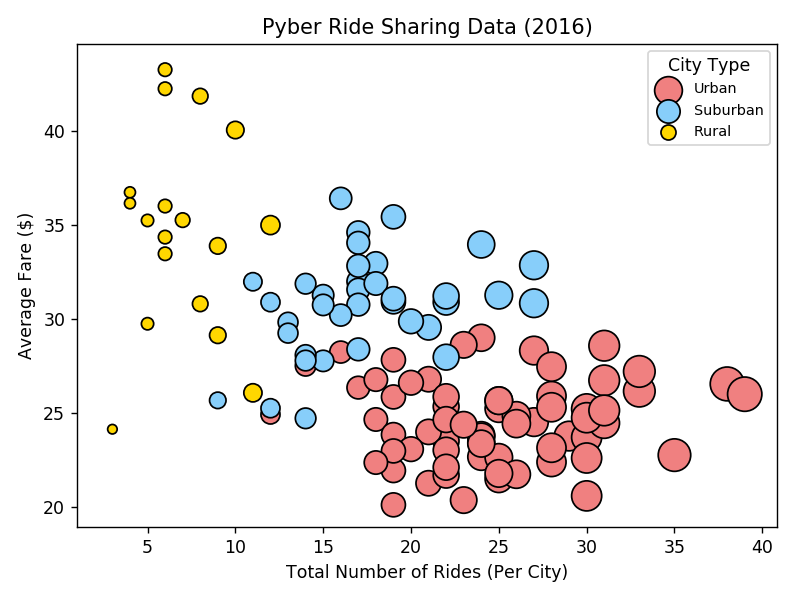

In [66]:
plt.scatter(ride_id1, fare_av1, marker="o", s=driver_count1*10, facecolors="lightcoral", edgecolors="black", label="Urban")
plt.scatter(ride_id2, fare_av2, marker="o", s=driver_count2*10, facecolors="lightskyblue", edgecolors="black", label="Suburban")
plt.scatter(ride_id3, fare_av3, marker="o", s=driver_count3*10, facecolors="gold", edgecolors="black", label="Rural")
# Build the scatter plots for each city types
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Incorporate the other graph properties
# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", numpoints=1, scatterpoints=1, loc="best", title="City Type", labelspacing=0.5)

# Incorporate a text label regarding circle size
plt.tight_layout()

# Show plot
plt.show()
# Save Figure

In [ ]:
plt.scatter(x=combined_data["Total Number of Rides (Per City)"]),
            y=combined_data["Average Fare ($)"]),
            

## Total Fares by City Type

In [45]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [46]:
fare_av_total = sum(fare_av)
fare_av_total

623.4797705627706

In [47]:
# Calculate Type Percents
city_type = combined_data.groupby("type")

fare_av = (city_type["fare"].sum())
 

df_city = pd.DataFrame(fare_av)
df_city['Total'] = (fare_av/fare_av_total)*100

df_city.head()




,fare,Total
type,,
Rural,4327.93,694.157245
Suburban,19356.33,3104.564240
Urban,39854.38,6392.249096


<IPython.core.display.Javascript object>


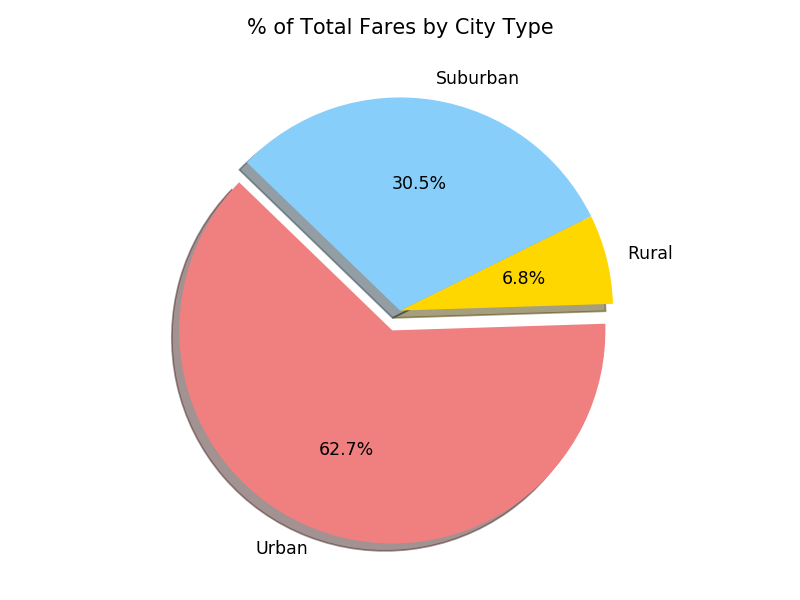

In [53]:
# Build Pie Chart
type = ["Rural", "Suburban", "Urban"]
Total = [6.8, 30.46, 62.72]
colors = ["gold", "lightskyblue", "lightcoral"]


plt.title("% of Total Fares by City Type")
plt.pie(Total, labels=type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=1.8, radius=1, explode=[0,0,.1])
plt.tight_layout()
plt.show()
# Save Figure

## Total Rides by City Type

In [ ]:
ride_id_total = sum(ride_id)
ride_id_total

In [ ]:
# Calculate Ride Percents
city_type = combined_data.groupby("type")

ride_id = (city_type["ride_id"].count())
 

df_city = pd.DataFrame(ride_id)
df_city['Total'] = (ride_id/ride_id_total)*100

df_city.head()



<IPython.core.display.Javascript object>


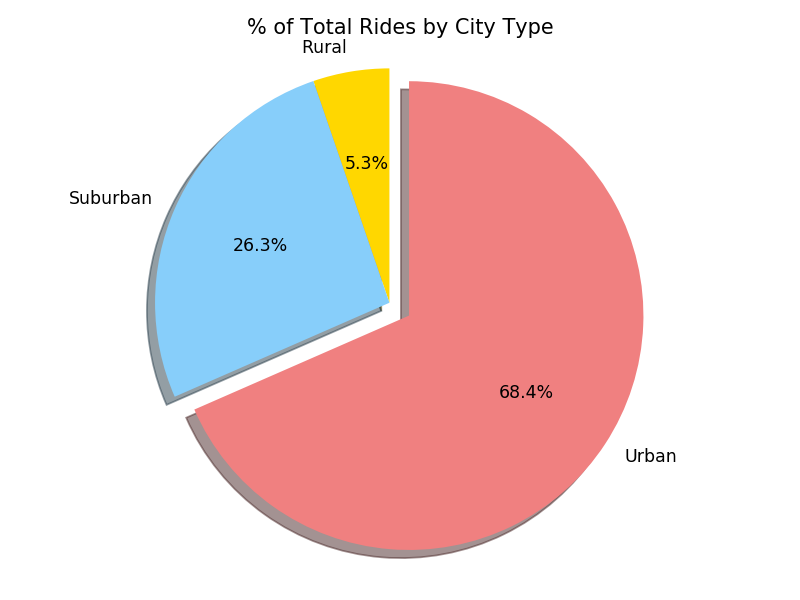

In [55]:
# Build Pie Chart
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

type = ["Rural", "Suburban", "Urban"]
Total = [5.26, 26.3, 68.42]
colors = ["gold", "lightskyblue", "lightcoral"]


plt.title("% of Total Rides by City Type")
plt.pie(Total, labels=type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90, radius=1, explode=[0,0,.1])
plt.axis("equal")
plt.tight_layout()
plt.show()

# Save Figure


## Total Drivers by City Type

In [58]:
city_type = city_data_to_load.groupby(["type"]).sum()['driver_count']/city_data_to_load['driver_count'].sum() * 100
city_type

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

<IPython.core.display.Javascript object>


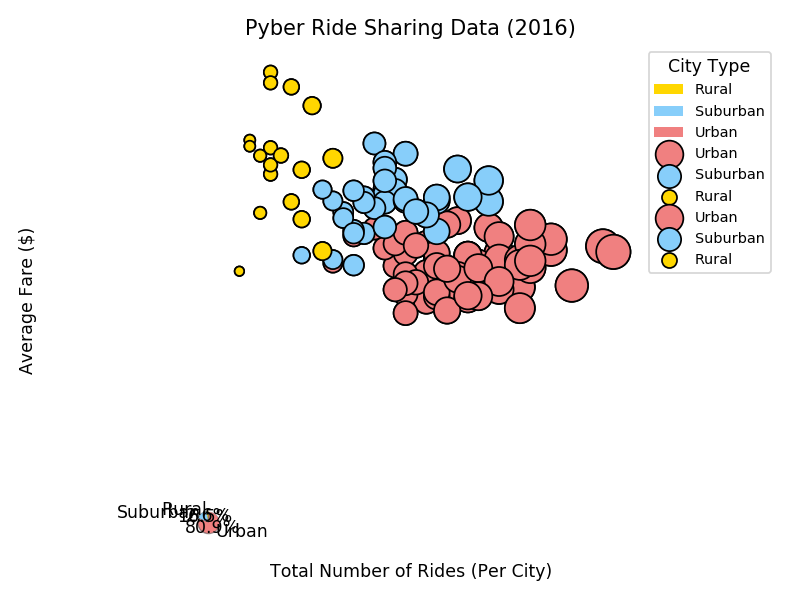

In [60]:
# Calculate Driver Percents
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

type = ["Rural", "Suburban", "Urban"]
Total = [5.26, 26.3, 68.42]
colors = ["gold", "lightskyblue", "lightcoral"]


plt.title("% of Total Rides by City Type")
plt.pie(city_type, labels=type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90, radius=1, explode=[0,0,.1])
plt.axis("equal")
plt.tight_layout()
plt.show()

# Build Pie Charts

# Save Figure


In [56]:
# Show Figure
plt.show()